#Quiz3
> sample_NoNA.csv를 읽어 들여 데이터 클랜징을 진행하세요

#풀이

##1. 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

filepath = '/content/drive/MyDrive/1. 데이터 분석을 위한 기초 통계학/1. 데이터 클랜징/data/sample_NoNA.csv'
df = pd.read_csv(filepath, encoding='cp949')
df.describe()

,cty,hwy
count,226.000000,229.000000
mean,29.588496,115.135371
std,112.855084,932.040957
min,-50.000000,12.000000
25%,14.000000,18.000000
50%,17.000000,25.000000
75%,19.000000,28.000000
max,999.000000,9999.000000


> 현재 정보로 도심 연비와 고속 연비의 개수가 다른 것을 봐서는 결측치가 존재하는 것을 알 수 있다. 평균 연비를 보면 도심연비는 29이고 고속연비는 115로 이상치가 존재하는 것을 알 수 있다. 도심연비의 최소값이 음수로 나타나고 최대값이 100을 넘는 수치 그리고 사분위수에 비해 많은 차이가 나는 것을 봐서 이상치가 존재함을 알 수 있다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   癤풻lass  219 non-null    object 
 1   cty     226 non-null    float64
 2   hwy     229 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.6+ KB


> 총 234행 중 class에서는 219, cty에서는 226, hwy에서는 229를 제외한 나머지가 결측치 인 것을 알 수 있다.

In [6]:
df.head(20)

,癤풻lass,cty,hwy
0,compact,18.0,29.0
1,compact,21.0,29.0
2,compact,NaN,31.0
3,compact,21.0,30.0
4,compact,16.0,26.0
5,compact,18.0,26.0
6,compact,18.0,NaN
7,compact,18.0,26.0
8,compact,16.0,25.0
9,compact,20.0,28.0


>head를 통해 20번째 행까지의 데이터를 확인해 보니 class에 결측치가 나타난 것을 확인했다.

In [5]:
df[10:20]

,癤풻lass,cty,hwy
10,compact,19.0,27.0
11,NaN,15.0,25.0
12,compact,17.0,25.0
13,compact,17.0,25.0
14,compact,15.0,25.0
15,midsize,15.0,24.0
16,midsize,17.0,25.0
17,midsize,16.0,23.0
18,NaN,14.0,20.0
19,suv,11.0,15.0


>위의 결과로 10번과 12번이 compact이고 중간이 결측치 임으로 compact임을 예측할 수 있다. 하지만 17번이 midsize이고 19번이 suv인 18번은 무엇인지 예측할 수 없다. 따라서 예측 가능한 것은 변경하고 나머지는 제거할 것이다.


In [ ]:
df.isnull().sum()

癤풻lass    15
cty        8
hwy        5
dtype: int64

>클래스는 15, cty는 8, hwy 5개의 결측치가 존재한다.

##2. 변경된 파일 읽어 오기

In [ ]:
import pandas as pd

filepath = '/content/drive/MyDrive/1. 데이터 분석을 위한 기초 통계학/1. 데이터 클랜징/data/sample_NoNA_modify.csv'
df = pd.read_csv(filepath, encoding='cp949')
df.info()

###2.1 차종 결측치 제거
> 현재 나타난 class의 결측치는 예측할 수 없음으로 제거한다.

In [108]:
#class가 결측치인 데이터 추출
df['class']
df['class'].isnull()
df[df['class'].isnull()]

#class가 유효한 데이터 추출
df[df['class'].notnull()]
df_class = df[df['class'].notnull()]
df_class.isnull().sum()

class    0
cty      8
hwy      5
dtype: int64

> notnull함수를 이용하여 유효한 데이터만 추출하고 결과를 확인해 보면 class의 결측치가 제거된 것을 볼 수 있다.

##3. 이상치 처리

###3.1 이상치 확인

In [20]:
df_class.describe()

,cty,hwy
count,221.000000,224.000000
mean,29.972851,117.299107
std,114.100670,942.317620
min,-50.000000,12.000000
25%,14.000000,18.000000
50%,17.000000,25.000000
75%,19.000000,28.000000
max,999.000000,9999.000000


> 최소값에 음수가 나타나거나 최대값이 100을 넘은 수가 나타남으로 이상치가 존재함을 알 수 있다.

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df_class['cty'])

> 이상치 확인을 위해 boxplot을 실행했지만 아무런 결과도 나타나지 않는다. 이는 결측치가 포함되어 있어 나타나는 문제일 수 있다.

In [18]:
cty_series = df_class['cty']
cty_series[cty_series.notnull()]

0       18.0
1       21.0
3       21.0
4       16.0
5       18.0
       ...  
229     19.0
230    999.0
231     16.0
232     18.0
233     17.0
Name: cty, Length: 221, dtype: float64

> 이상치 확인을 위해 결측치가 배제된 cty 정보만 추출하였고 이 중 유효 데이터만 추출하기 위해 notnull 함수를 적용했다.

In [ ]:
plt.boxplot(cty_series[cty_series.notnull()])

> boxplot 실행 결과 음수와 큰 범위의 양수가 결측치로 나타나는 것을 확인할 수 있다.

In [22]:
cty_series[cty_series.notnull()].describe()

count    221.000000
mean      29.972851
std      114.100670
min      -50.000000
25%       14.000000
50%       17.000000
75%       19.000000
max      999.000000
Name: cty, dtype: float64

>describe을 통해 이상치를 확인할 수도 있다.

###3.2 한계치를 이용한 이상치 확인

In [ ]:
import numpy as np

cty_series_notnull = cty_series[cty_series.notnull()]
q1, q3 = np.percentile(cty_series_notnull, [25,75])
iqr = q3-q1

cty_lowerfence = q1-iqr*1.5
cty_upperfence = q3+iqr*1.5

df_class[df_class['cty']<cty_lowerfence]

,class,cty,hwy
63,suv,-50.0,15.0


> 최저 한계치보다 작은 값으로 하나의 음수결과가 나타난 것을 볼 수 있다.

In [ ]:
df_class[df_class['cty']>cty_upperfence]

,class,cty,hwy
99,subcompact,28.0,33.0
106,subcompact,999.0,36.0
156,midsize,999.0,27.0
196,compact,28.0,37.0
212,compact,33.0,44.0
221,subcompact,35.0,44.0
222,subcompact,29.0,41.0
230,midsize,999.0,29.0


> 위의 결과에서 50이하의 연비를 갖는 차종들이 이상치라고 판단하기에는 무리가 있다.

In [ ]:
cty_upperfence = q3+iqr*3
df_class[df_class['cty']>cty_upperfence]

,class,cty,hwy
106,subcompact,999.0,36.0
156,midsize,999.0,27.0
221,subcompact,35.0,44.0
230,midsize,999.0,29.0


> 위의 결과로 35가 이상치라고 나타나긴 했지만 실제 정상적인 수치로 판단되기 때문에 최대한계치를 35로 지정하여 이후 데이터를 이상치로 처리할 것이다.

In [ ]:
df_class[df_class['class']=='suv']
df_class[df_class['hwy']==15]

df_class[(df_class['class']=='suv') & (df_class['hwy']==15)]

,class,cty,hwy
19,suv,11.0,15.0
30,suv,11.0,15.0
63,suv,-50.0,15.0
130,suv,11.0,15.0
133,suv,11.0,15.0
198,suv,11.0,15.0


>위의 결과 처럼 class과 suv이고 hwy가 15인 데이터를 얻기 위해 & 연산을 이용했다. 두 논리에 대한 연산이므로 &(and) 연산을 한 것이다.

> 위의 결과에서 이상치를 처리하기 위해 사용해야 할 것은 중앙값이다. 평균의 경우 이상치가 적용됨으로 사용할 수 없다.

In [ ]:
df_class_suv_15 = df_class[(df_class['class']=='suv') & (df_class['hwy']==15)]
df_class_suv_15.describe()

,cty,hwy
count,6.000000,6.0
mean,0.833333,15.0
std,24.903146,0.0
min,-50.000000,15.0
25%,11.000000,15.0
50%,11.000000,15.0
75%,11.000000,15.0
max,11.000000,15.0


> 위의 결과처럼 평균은 0보다 작은 소수가 나와 말도 안되는 연비가 나타나게 된다. 따라서 중앙값을 이용하여 대표값을 선정해야 한다.

###3.3 이상치 함수 만들기

In [23]:
className = 'suv'
mpg='20'
df1= pd.DataFrame()
df1=df1.append({
      'class':className,
      'cty':999,
      'hwy':mpg
  }, ignore_index=True)
df1=df1.append({
      'class':className,
      'cty':999,
      'hwy':mpg
  }, ignore_index=True)
df1=df1.append({
      'class':className,
      'cty':11,
      'hwy':mpg
  }, ignore_index=True)
df1=df1.append({
      'class':className,
      'cty':-50,
      'hwy':mpg
  }, ignore_index=True)
df1

,class,cty,hwy
0,suv,999.0,20
1,suv,999.0,20
2,suv,11.0,20
3,suv,-50.0,20


In [24]:
target='cty'
lower= 0
upper=100

boolupper = df1[target]>upper
boollower = df1[target]<lower
df1[boolupper | boollower]


,class,cty,hwy
0,suv,999.0,20
1,suv,999.0,20
3,suv,-50.0,20


> 0보다 작은 값과 100보다 큰 값은 동시에 일어날 수 없는 것이고 두 경우 다 존재해야 하기 때문에 |(or)연산을 처리하였다.

In [25]:
for val in df1[boolupper | boollower][target]:
  print(val)

999.0
999.0
-50.0


> 위의 정보가 들어 있는 값을 대표값으로 변경해야 한다. 하지만 위처럼 중복된 값이 나타나 의미없이 여러번 반복될 수 있음으로 중복데이터를 제거해 보자.

In [26]:
print(df1[boolupper | boollower])
df1_drop_duplicates = df1[boolupper | boollower].drop_duplicates(target)
df1_drop_duplicates

  class    cty hwy
0   suv  999.0  20
1   suv  999.0  20
3   suv  -50.0  20


,class,cty,hwy
0,suv,999.0,20
3,suv,-50.0,20


In [27]:
min = 11

for val in df1_drop_duplicates[target]:
  # print(val)
  df1 = df1.replace({target:val}, {target:min})

df1

,class,cty,hwy
0,suv,11.0,20
1,suv,11.0,20
2,suv,11.0,20
3,suv,11.0,20


>1. class와 hwy과 같은 차종의 cty 중간값 구하기
2. 이상치 중복 제거
3. 이상치 치환

####3.3.1 class와 hwy과 같은 차종의 cty 중간값 구하기

In [ ]:
className = 'suv'
mpg=15

df['class']==className
df['hwy']==mpg

> 차종(className)이 compact이고 연비(mpg)가 31인 데이터 추출을 위해 각각의 정보 확인

In [ ]:
bool_target = (df['class']==className) & (df['hwy']==mpg)
df[bool_target]

> 차종과 고속연비가 같은 데이터 추출

In [ ]:
df_sample = df[bool_target]
median = np.median(df_sample['cty'])
median

11.0

In [ ]:
def ConvertAbnormality(data_frame, className, mpg):
  bool_target = (data_frame['class']==className) & (data_frame['hwy']==mpg)
  df_sample = data_frame[bool_target]
  median = np.median(df_sample['cty'])
  print(median)

ConvertAbnormality(df, 'suv', 15)

11.0


####3.3.2 이상치 중복 제거

In [ ]:
lower=0
upper=100

bool_upper = df_sample['cty']>upper
bool_lower = df_sample['cty']<lower

df_drop = df_sample[bool_lower | bool_upper].drop_duplicates('cty')

> lower와 upper를 이용하여 기준값을 설정하고 기준값을 벗어난 값 중 'cty'를 기준으로 중복값을 제거한다.

In [91]:
def ConvertAbnormality(data_frame, className, mpg, lower, upper):
  #중간값 구하기
  bool_target = (data_frame['class']==className) & (data_frame['hwy']==mpg)
  df_sample = data_frame[bool_target]
  median = np.median(df_sample['cty'])
  
  #중복 제거
  bool_upper = df_sample['cty']>upper
  bool_lower = df_sample['cty']<lower

  df_drop = df_sample[bool_lower | bool_upper].drop_duplicates('cty')
  print(df_drop)

ConvertAbnormality(df, 'suv', 15, 0, 100)

   class   cty   hwy
63   suv -50.0  15.0


####3.3.3 이상치 치환

In [ ]:
bool_target = (df['class']==className) & (df['hwy']==mpg)
df[bool_target]

> 전체 dataframe에서 조건이 맞는 데이터만 변경을 할 예정이기 때문에 df[bool_target]을 이용하는 것이다.

In [ ]:
for val in df_drop['cty']:
  df[bool_target] = df[bool_target].replace({'cty':val}, {'cty':median})

print(df[bool_target])
print(df.tail(10))

> 이상치가 발생된 도심연비의 값을 중간값으로 변경한다. 조건에 맞는 데이터만 변경했음으로 df[bool_target]으로 출력하면 변경된 내용을 확인할 수 있지만 그 이외의 데이터는 변경되지 않았음으로 df.tail()을 실행하면 변경되지 않은 부분이 나타나는 것을 볼 수 있다. 

>df.tail은 마지막 데이터만 보여주는 거으로 인자가 없으면 5개를 기본 정보로 출력하며 수치를 입력하면 입력한 데이터 만큼 출력된다.

In [92]:
def ConvertAbnormality(data_frame, className, mpg, lower, upper):
  #중간값 구하기
  bool_target = (data_frame['class']==className) & (data_frame['hwy']==mpg)
  df_sample = data_frame[bool_target]
  median = np.median(df_sample['cty'])
  
  #중복 제거
  bool_upper = df_sample['cty']>upper
  bool_lower = df_sample['cty']<lower

  df_drop = df_sample[bool_lower | bool_upper].drop_duplicates('cty')

  #이상치 치환
  for val in df_drop['cty']:
    data_frame[bool_target] = data_frame[bool_target].replace({'cty':val}, {'cty':median})

  return data_frame

df2 = ConvertAbnormality(df, 'midsize', 29.0, 0, 100)
df2

,class,cty,hwy
0,compact,18.0,29.0
1,compact,21.0,29.0
2,compact,NaN,31.0
3,compact,21.0,30.0
4,compact,16.0,26.0
...,...,...,...
229,midsize,19.0,28.0
230,midsize,21.0,29.0
231,midsize,16.0,26.0
232,midsize,18.0,26.0


###3.4 이상치 제거 목록 만들기

In [ ]:
lowerfence=0
upperfence=100

df_lower = df_class[df_class['cty']<lowerfence]
df_upper = df_class[df_class['cty']>upperfence]

print(df_lower)
print(df_upper)

> 위의 결과는 최저한계치와 최대 한계치를 벗어난 이상치를 추출한 내용이다.

In [ ]:
df_abnormality = df_class[(df_class['cty']<lowerfence) | (df_class['cty']>upperfence)]
df_abnormality

> 모든 이상치를 추출하기 위해 |(or) 연산을 이용했다.

In [93]:
df_abnormality = pd.concat([df_lower, df_upper])
df_abnormality

,class,cty,hwy
89,pickup,13.0,999.0
125,suv,14.0,99.0
172,compact,20.0,9999.0
208,compact,19.0,9999.0


>concat 함수는 두 dataframe을 합치는 기능을 한다.

In [ ]:
for idx, row in df_abnormality.iterrows():
  print(idx)
  print(row)
  print('==========================')

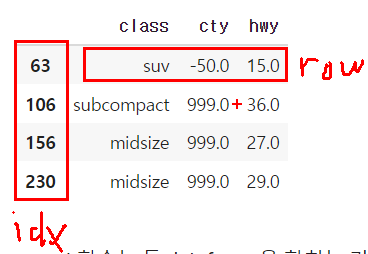

>iterrows()함수는 index와 row 정보를 전달한다. index는 위의 그림에서 idx를 의미하며 row는 각 행을 의미한다.

> 이상치 제거를 위해 필요한 정보는 class와 mpg이므로 row 정보에서 두 정보를 얻을 수 있다.

In [ ]:
for idx, row in df_abnormality.iterrows():
  #차종과 고속 연비 정보 추출
  class_name = row['class']
  mpg = row['hwy']
  #이상치 치환
  df_class = ConvertAbnormality(df_class, class_name, mpg, 0, 100)
  #치환 결과 확인
  bool_class = df_class['class']==class_name
  bool_hwy = df_class['hwy']==mpg
  print( df_class[(bool_class)&(bool_hwy)])

###3.5 버그수정

In [ ]:
  df_class = df[df['class'].notnull()]
  print(df_class.isnull().sum())
  print(df_class.describe())

>이전 코드에서 수치가 변경되었기 때문에 원본 데이터를 다시 읽어 들이고 결과를 확인한다.
* df_class.isnull().sum() : class가 0인지 확인
* df_class.describe() : cty의 max가 999인지 확인

In [ ]:
def getMedian(data_frame):
  print(data_frame.describe())

def ConvertAbnormality(data_frame, className, mpg, lower, upper):
  #중간값 구하기
  bool_target = (data_frame['class']==className) & (data_frame['hwy']==mpg)
  df_sample = data_frame[bool_target]
  #데이터가 2개인 경우 중간값이 아닌 최소값 전달
  # median = np.median(df_sample['cty'])
  getMedian(df_sample['cty'])
  
  #중복 제거
  # bool_upper = df_sample['cty']>upper
  # bool_lower = df_sample['cty']<lower

  # df_drop = df_sample[bool_lower | bool_upper].drop_duplicates('cty')

  #이상치 치환
  # for val in df_drop['cty']:
  #   data_frame[bool_target] = data_frame[bool_target].replace({'cty':val}, {'cty':median})

  # return data_frame

# ConvertAbnormality(df_class, 'suv', 15, 0, 100)
ConvertAbnormality(df_class, 'subcompact', 36, 0, 100)

count      2.000000
mean     512.000000
std      688.722005
min       25.000000
25%      268.500000
50%      512.000000
75%      755.500000
max      999.000000
Name: cty, dtype: float64


> 차종이 subcompact이고 고속연비가 36인 차는 2대만 존재하여 중간값이 대표값으로 사용할 수 없게 된다.

In [ ]:
def getMedian(data_frame):
  series_describe = data_frame.describe()
  print(series_describe['count'])

def ConvertAbnormality(data_frame, className, mpg, lower, upper):
  #중간값 구하기
  bool_target = (data_frame['class']==className) & (data_frame['hwy']==mpg)
  df_sample = data_frame[bool_target]
  #데이터가 2개인 경우 중간값이 아닌 최소값 전달
  # median = np.median(df_sample['cty'])
  getMedian(df_sample['cty'])
  
  #중복 제거
  # bool_upper = df_sample['cty']>upper
  # bool_lower = df_sample['cty']<lower

  # df_drop = df_sample[bool_lower | bool_upper].drop_duplicates('cty')

  #이상치 치환
  # for val in df_drop['cty']:
  #   data_frame[bool_target] = data_frame[bool_target].replace({'cty':val}, {'cty':median})

  # return data_frame

# ConvertAbnormality(df_class, 'suv', 15, 0, 100)
ConvertAbnormality(df_class, 'subcompact', 36, 0, 100)

2.0


> 위의 코드에서 print(series_describe['count']) 확인 결과 2라는 값을 얻었으므로 상황에 따른 중간값 또는 최소값을 반환할 수 있다.

In [109]:
def getMedian(data_frame):
  series_describe = data_frame.describe()
  if series_describe['count']==2:
    return series_describe['min']
  return series_describe['50%']

def ConvertAbnormality(data_frame, className, mpg, lower, upper):
  #중간값 구하기
  bool_target = (data_frame['class']==className) & (data_frame['hwy']==mpg)
  df_sample = data_frame[bool_target]
  #데이터가 2개인 경우 중간값이 아닌 최소값 전달
  # median = np.median(df_sample['cty'])
  median = getMedian(df_sample['cty'])
  
  #중복 제거
  bool_upper = df_sample['cty']>upper
  bool_lower = df_sample['cty']<lower

  df_drop = df_sample[bool_lower | bool_upper].drop_duplicates('cty')

  #이상치 치환
  for val in df_drop['cty']:
    data_frame[bool_target] = data_frame[bool_target].replace({'cty':val}, {'cty':median})

  return data_frame

# ConvertAbnormality(df_class, 'suv', 15, 0, 100)
ConvertAbnormality(df_class, 'subcompact', 36, 0, 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,class,cty,hwy
0,compact,18.0,29.0
1,compact,21.0,29.0
2,compact,NaN,31.0
3,compact,21.0,30.0
4,compact,16.0,26.0
...,...,...,...
229,midsize,19.0,28.0
230,midsize,999.0,29.0
231,midsize,16.0,26.0
232,midsize,18.0,26.0


In [110]:
for idx, row in df_abnormality.iterrows():
  #차종과 고속 연비 정보 추출
  class_name = row['class']
  mpg = row['hwy']
  #이상치 치환
  df_class = ConvertAbnormality(df_class, class_name, mpg, 0, 100)
  #치환 결과 확인
  bool_class = df_class['class']==class_name
  bool_hwy = df_class['hwy']==mpg
  print( df_class[(bool_class)&(bool_hwy)])

     class   cty    hwy
89  pickup  13.0  999.0
    class   cty   hwy
125   suv  14.0  99.0
       class   cty     hwy
172  compact  20.0  9999.0
208  compact  19.0  9999.0
       class   cty     hwy
172  compact  20.0  9999.0
208  compact  19.0  9999.0


###3.6 고속연비 확인
> 고속연비 관련 boxplot을 만들어 보세요

In [ ]:
#결측치 확인
df_class.isnull().sum()

>결측치를 확인해 보면 5개가 나타나는 것을 알 수 있다. 이렇게 결측치가 존재하면 boxplot을 표현할 수 없음으로 이를 제거해야 한다.

In [ ]:
#highway만 별도로 추출
hwy_series = df_class['hwy']
print(type(hwy_series))
hwy_series.isnull().sum()

> dataframe에서 하나의 feature를 선택하여 추출하면 series가 된다. 위의 코드에서 df_class에서 고속연비(hwy)를 지정하여 추출한 후 type을 확인해 보면 series인 것을 확인할 수 있다.

> sereies역시 isnull함수를 지원하며 마찬가지고 5개의 결측치가 나타나는 것을 볼 수 있다.

In [ ]:
#유효 데이터 추출
hwy_series.notnull()
hwy_series[hwy_series.notnull()]

> 결측치 제거를 위해 notnull함수를 이용하여 유효 데이터만 추출했다.

{'boxes': [<matplotlib.lines.Line2D at 0x7fc8e860e350>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc8e8613390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc8e861a3d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc8e8613e50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc8e860e8d0>,
  <matplotlib.lines.Line2D at 0x7fc8e860ee10>]}

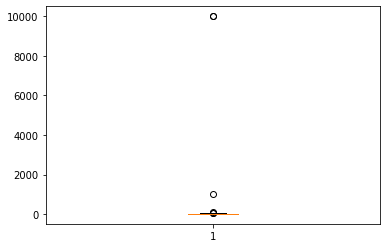

In [59]:
#boxplot
hwy_series_valid = hwy_series[hwy_series.notnull()]
plt.boxplot(hwy_series_valid)

>이렇게 유효 데이터를 이용하여 간단하게 boxplot를 실행해 보았고 양의 이상치만 발생되는 것을 확인했다.

In [ ]:
#방법 1
hwy_series_valid_describe = hwy_series_valid.describe()
q1= hwy_series_valid_describe['25%']
q3= hwy_series_valid_describe['75%']

In [ ]:
#방법2
import numpy as np
q1, q3 = np.percentile(hwy_series_valid, [25, 75])

>위와 같이 다양한 방법으로 4분위수를 구할 수 있다.

In [ ]:
#한계치 구하기
iqr = q3-q1
lowerfence = q1 - iqr*1.5
upperfence = q3 + iqr*1.5

> 위에서 구한 q1과 q3를 이용하여 iqr를 구하고 최저한계치와 최대한계치를 구한다.

In [ ]:
#결과 확인
print(df_class[df_class['hwy']<lowerfence])
print(df_class[df_class['hwy']>upperfence])

>이를 이용하여 결과를 확인해 보면 212, 221에 고속연비가 44로 나타난다. 44는 정상적인 연비로 볼 수 있음으로 이를 제외한 나머지 값들을 이상치로 판단해야 한다. 따라서 최대한계치를 50으로 수정하여 이상치를 구해보자

In [ ]:
upperfence = 50
#최저 한계치와 최대 한계치가 존재하는 경우
df_lower = df_class[df_class['hwy']<lowerfence]
df_upper = df_class[df_class['hwy']>upperfence]
df_list = pd.concat([df_lower, df_upper])
df_list

>concat 함수를 이용하면 두 dataframe을 하나라 합칠 수 있다. 만약 최저 한계치와 최고 한계치가 존재한다면 이를 이용하여 위처럼 하나로 합칠 수 있다.

In [94]:
#최대 한계치만 존재하는 경우
df_class[df_class['hwy']>upperfence]

,class,cty,hwy
89,pickup,13.0,999.0
125,suv,14.0,99.0
172,compact,20.0,9999.0
208,compact,19.0,9999.0


>여기서는 최대 한계치만 존재함으로 위와 같이 최대 한계치를 이용한 이상치만 구하면 된다. 실행 결과 중복된 데이터가 나타난다.

In [95]:
#중복값 제거
df_abnormality = df_class[df_class['hwy']>upperfence].drop_duplicates()
df_abnormality

,class,cty,hwy
89,pickup,13.0,999.0
125,suv,14.0,99.0
172,compact,20.0,9999.0
208,compact,19.0,9999.0


>중복 데이터를 제거 하기 위해 drop_duplicates함수를 이용했다. 여기서 hwy가 9999로 중복되었다 생각할 수 있지만 차종과 도심연비에 따른 이상치를 치환하게 됨으로 모든 feature에 대해 중복 확인을 해야 한다.

> 이렇게 얻은 값을 반복문을 이용하여 hwy 값만 출력해 보자.

In [ ]:
for idx, row in df_abnormality.iterrows():
  print(idx)
  print(row)

> iterrows 함수를 이용하면 index 정보와 각 행(row)에 대한 정보를 얻을 수 있다. 위의 코드에서 idx는 index를 의미하며 각 행별 순차적 번호이다. row는 각 차종별 정보를 갖게 된다. 이를 이용하여 차종과 도심연비가 같은 차에 대한 고속연비의 중간값을 구해보자

In [ ]:
import numpy as np
for idx, row in df_abnormality.iterrows():
  #차종이름과 연비 추출
  class_name = row['class']
  mpg = row['cty']
  print(class_name, " : ", mpg)

>row 정보에는 차종, 도심연비, 고속연비가 포함되어 있음으로 이를 분리하여 차종과 도심연비를 추출하였다.

In [ ]:
import numpy as np
for idx, row in df_abnormality.iterrows():
  #차종이름과 연비 추출
  class_name = row['class']
  mpg = row['cty']
  print(class_name, " : ", mpg)

  #두 조건이 같은 값을 추출
  bool_class = df_class['class']==class_name
  bool_mpg = df_class['cty']==mpg
  print(df_class[bool_class & bool_mpg])

> 이렇게 추출한 정보를 이용하여 두 정보가 포함된 모든 데이터를 읽어 들였다.

In [ ]:
import numpy as np
for idx, row in df_abnormality.iterrows():
  #차종이름과 연비 추출
  class_name = row['class']
  mpg = row['cty']
  print(class_name, " : ", mpg)

  #두 조건이 같은 값을 추출
  bool_class = df_class['class']==class_name
  bool_mpg = df_class['cty']==mpg
  print(df_class[bool_class & bool_mpg])
  
  #고속 연비 중간값 추출
  df_class_sample = df_class[bool_class & bool_mpg]
  sample_median = np.median(df_class_sample['hwy'])
  print('median : ', sample_median)
  print('=======================================')

>이렇게 읽어 들인 정보를 기반으로 중간값을 구했다. 이를 이용하여 이상치를 치환해 보자

In [ ]:
import numpy as np
for idx, row in df_abnormality.iterrows():
  #차종이름과 연비 추출
  class_name = row['class']
  mpg = row['cty']

  #두 조건이 같은 값을 추출
  bool_class = df_class['class']==class_name
  bool_mpg = df_class['cty']==mpg
  
  #고속 연비 중간값 추출
  df_class_sample = df_class[bool_class & bool_mpg]
  sample_median = np.median(df_class_sample['hwy'])

  #1. dataframe에서 이상치 확인
  print(df_class_sample)
  print('이상치 : ', row['hwy'])

  #2. 이상치 치환 확인
  print(df_class_sample.replace({'hwy':row['hwy']}, {'hwy':sample_median}))

  #3. 원본 df_class에 이상치 치환 적용
  df_class[bool_class & bool_mpg]=df_class_sample.replace({'hwy':row['hwy']}, {'hwy':sample_median})
  print(df_class[bool_class & bool_mpg])

  print('===================================')

# df_class.describe()

> 이상치를 중앙값으로 치환할 것이다. 그래서 다음과 같은 순서로 코딩을 진행했다.
1. dataframe에서 이상치 확인
*  그래서 우선 이상치를 얻기 위해 row['hwy']를 확인 하였다. 
2. 이상치 치환 확인
* 이상치를 이용하여 replace에 적용하고 정상적으로 치환되는지 결과를 확인한다.
3. 원본 df_class에 이상치 치환 적용
* df_class_sample은 df_class에 일부분이므로 치환된 결과를 적용하기 위해서는 df_class에 저장해야 한다.

In [ ]:
def getMedian(data_frame):
  series_describe = data_frame.describe()
  if series_describe['count']==2:
    return series_describe['min']
  return series_describe['50%']

def ConvertAbnormality(data_frame, className, mpg, lower, upper, src, dest):
  #중간값 구하기
  bool_target = (data_frame['class']==className) & (data_frame[src]==mpg)
  df_sample = data_frame[bool_target]
  #데이터가 2개인 경우 중간값이 아닌 최소값 전달
  # median = np.median(df_sample['cty'])
  median = getMedian(df_sample[dest])
  
  #중복 제거
  bool_upper = df_sample[dest]>upper
  bool_lower = df_sample[dest]<lower

  df_drop = df_sample[bool_lower | bool_upper].drop_duplicates(dest)

  #이상치 치환
  for val in df_drop[dest]:
    data_frame[bool_target] = data_frame[bool_target].replace({dest:val}, {dest:median})

  return data_frame

for idx, row in df_abnormality.iterrows():
  #차종이름과 연비 추출
  class_name = row['class']
  mpg = row['cty']
  df_class = ConvertAbnormality(df_class, class_name, mpg, 0, 50, 'cty', 'hwy')

  bool_class = df_class['class']==class_name
  bool_mpg = df_class['cty']==mpg
  print(df_class[bool_class & bool_mpg])


> ConvertAbnormality 함수에서 도심연비에 대한 이상치 처리나 고속 연비에 대한 이상치 처리는 같은 패턴으로 동작되어 src와 desc로 변수 처리하면 두 경우 모두 활용할 수 있다.

##4. 결측치 처리

In [112]:
df_class.isnull().sum()

class    0
cty      8
hwy      5
dtype: int64

>위의 결과와 같이 도심 연비 8, 고속연비 5개의 결측치가 나타난 것을 볼 수 있다.

> 도심 연비 결측치를 출력해 보세요

In [113]:
df_class[df_class['cty'].isnull()]

,class,cty,hwy
2,compact,NaN,31.0
20,suv,NaN,20.0
58,suv,NaN,17.0
93,subcompact,NaN,24.0
100,subcompact,NaN,32.0
137,suv,NaN,17.0
192,compact,NaN,27.0
199,suv,NaN,18.0


> 차종이 compact이고 고속연비가 31인 차들을 출력해 주세요

In [ ]:
bool_class = df_class['class']=='compact'
bool_hwy = df_class['hwy']==31

df_class[bool_class & bool_hwy]
df_class[bool_class & bool_hwy].describe()

> 이상치가 처리된 상태이고 결측치는 평균연산에 적용되지 않기 때문에 대표값을 평균으로 사용할 수도 있다.

In [105]:
df_class[bool_class & bool_hwy]['cty'].mean()

21.5

> 위와 같이 도심 연비에 대한 평균을 구할 수 있다.

> 차종이 compact이고 고속연비가 31인 차 중 결측치를 평균으로 치환하시오

In [ ]:
class_name = 'compact'
mpg = 31

>차종과 고속연비를 별도의 변수에 저장한다.

In [ ]:
bool_class = df_class['class'] == class_name
bool_hwy = df_class['hwy'] == mpg

#차종이 compact이고 고속연비가 31인 도심연비의 평균
cty_mean = df_class[bool_class & bool_hwy]['cty'].mean()

> 두 조건을 만족하는 도심 연비를 구한다.

In [ ]:
df_class[bool_class & bool_hwy] = df_class[bool_class & bool_hwy].replace({'cty':np.nan}, {'cty':cty_mean})
df_class[bool_class & bool_hwy]

>차종과 고속연비가 같은 차 중 결측치가 있으면 평균으로 치환한다.

> 결측치 목록 만들기 ( 중복 제거), 반복문을 통해 차종과 고속 연비를 출력하세요

In [ ]:
#중복을 제거한 결측치 목록
df_class_drop = df_class[df_class['cty'].isnull()].drop_duplicates()
print(df_class[df_class['cty'].isnull()])
df_class_drop

> 현재 나타난 결과에 중복된 데이터가 나타남으로 이를 제거한 목록을 만든다.

In [ ]:
#데이터 확인
for idx, row in df_class_drop.iterrows():
  print(idx, " : ", row.values[0], " : ", row.values[1]," : ", row.values[2])

> 이렇게 만든 목록을 이용하여 모든 데이터를 출력할 수 있다. 기존에는 feature를 이용하여 결과를 얻었다면 이번에는 values를 이용하여 각 feature 정보를 얻을 수 있다.

> 모든 결측치를 치환하세요

In [ ]:
for idx, row in df_class_drop.iterrows():
  class_name = row.values[0]
  mpg = row.values[2]
  
  bool_class = df_class['class'] == class_name
  bool_hwy = df_class['hwy'] == mpg
  cty_mean = df_class[bool_class & bool_hwy]['cty'].mean()

  df_class[bool_class & bool_hwy] = df_class[bool_class & bool_hwy].replace({'cty':np.nan}, {'cty':cty_mean})

df_class.isnull().sum()

> 고속 연비의 결측치를 처리하세요
1. 결측치 목록 만들기
2. 위의 코드를 활용하여 결측치 치환

In [127]:
#결측치 목록 만들기
df_class_drop = df_class[df_class['hwy'].isnull()].drop_duplicates()
print(df_class[df_class['hwy'].isnull()])
df_class_drop

       class   cty  hwy
6    compact  18.0  NaN
158  midsize  16.0  NaN
193  compact  24.0  NaN
202   pickup  17.0  NaN
211  compact  17.0  NaN


,class,cty,hwy
6,compact,18.0,NaN
158,midsize,16.0,NaN
193,compact,24.0,NaN
202,pickup,17.0,NaN
211,compact,17.0,NaN


In [ ]:
for idx, row in df_class_drop.iterrows():
  class_name = row.values[0]
  mpg = row.values[1]

  bool_class = df_class['class'] == class_name
  bool_hwy = df_class['cty'] == mpg
  cty_mean = df_class[bool_class & bool_hwy]['hwy'].mean()

  df_class[bool_class & bool_hwy] = df_class[bool_class & bool_hwy].replace({'hwy':np.nan}, {'hwy':cty_mean})

df_class.isnull().sum()

> 실행 결과 hwy의 결측치 1개가 변경되지 않은 것을 볼 수 있다. 

In [132]:
df_class[df_class['hwy'].isna()]

,class,cty,hwy
202,pickup,17.0,NaN


> 위와 같이 isna함수를 이용하여 결측치 정보를 얻을 수 있다.

In [ ]:
class_name = 'pickup'
mpg = 17

bool_class = df_class['class'] == class_name
bool_hwy = df_class['cty'] == mpg
df_class[bool_class & bool_hwy]

> 실행 결과 1개의 데이터만 존재한다. 따라서 이전에 만들었던 반복문을 수정해 보자

In [ ]:
for idx, row in df_class_drop.iterrows():
  class_name = row.values[0]
  mpg = row.values[1]

  bool_class = df_class['class'] == class_name
  bool_hwy = df_class['cty'] == mpg
  cty_mean = df_class[bool_class & bool_hwy]['hwy'].mean()
  #1. 평균 확인
  print('cty_mean : ',cty_mean)

  #2. 조건문을 이용한 결측치 처리
  if np.isnan(cty_mean):
    print(df_class[bool_class & bool_hwy].index)
    df_class = df_class.drop(index=df_class[bool_class & bool_hwy].index)
  else :
    df_class[bool_class & bool_hwy] = df_class[bool_class & bool_hwy].replace({'hwy':np.nan}, {'hwy':cty_mean})

df_class.isnull().sum()

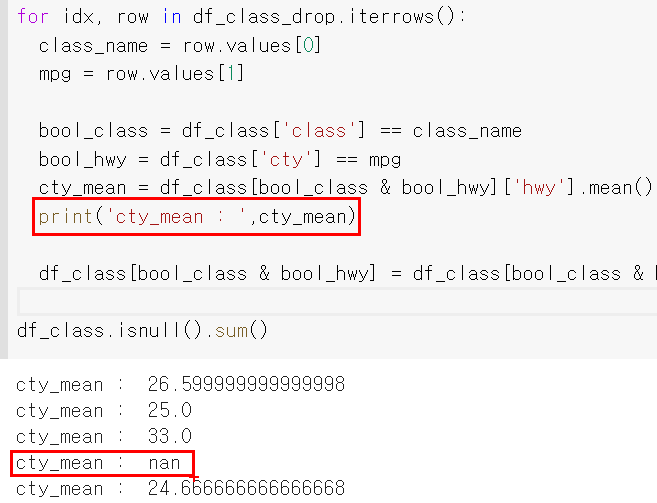

> 평균 정보가 결측치만 존재하는 경우 nan만 나타나게 된다. 이를 이용하여 결측치가 1개이면 제거하고 여러개이면 평균으로 치환하도록 변경했다.

##함수화

In [ ]:
# df_class_drop = df_class[df_class['hwy'].isnull()].drop_duplicates()
# df_class_drop

def getNaNList(data_frame, cty_hwy):
  df_class_NaN = data_frame[cty_hwy].isnull()
  return data_frame[df_class_NaN].drop_duplicates()

# df_class_drop = getNaNList(df_class, 'cty')
df_class_drop = getNaNList(df_class, 'hwy')
df_class_drop

In [ ]:
df_class_sample = df_class.head()

for idx, row in df_class_sample.iterrows():
  class_name = row.values[0]
  mpg = row.values[1]

  print(class_name, mpg)

In [ ]:
def getInfo(row, feature):
  return row.values[0], row.values[feature]

for idx, row in df_class_sample.iterrows():
  # class_name = row.values[0]
  # mpg = row.values[1]
  class_name, mpg = getInfo(row, 2)

  print(class_name, mpg)

In [ ]:
def getMean(data_frame, class_name, mpg, src, dest):
  bool_class = data_frame['class'] == class_name
  bool_mpg = data_frame[src] == mpg
  return data_frame[bool_class & bool_mpg][dest].mean()

for idx, row in df_class_drop.iterrows():
  class_name = row.values[0]
  mpg = row.values[1]

  cty_mean = getMean(df_class, class_name, mpg, 'cty', 'hwy')
  #2. 조건문을 이용한 결측치 처리
  if np.isnan(cty_mean):
    print(df_class[bool_class & bool_hwy].index)
    df_class = df_class.drop(index=df_class[bool_class & bool_hwy].index)
  else :
    df_class[bool_class & bool_hwy] = df_class[bool_class & bool_hwy].replace({'hwy':np.nan}, {'hwy':cty_mean})

df_class.isnull().sum()